In [ ]:
! pip install scipy==1.7.0
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.4 MB 2.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
import pandas as pd
import time
import numpy as np
from numpy import *
warnings.filterwarnings("ignore")
from bayes_opt import BayesianOptimization, UtilityFunction
import sklearn as sklearn
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import random
from sklearn import svm
from sklearn.neural_network import MLPRegressor
import plotly.express as px
import plotly.graph_objects as go

Mounted at /content/gdrive


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15631dfac0>,
      dtype=object)

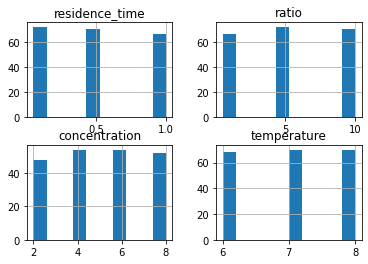

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Rutgers/Merck folder/dataset_alkox.csv")
df.iloc[:,:-1].hist()

In [ ]:
df[df.iloc[:,-1]==sort(df.iloc[:,-1].unique())[-1]]

,residence_time,ratio,concentration,temperature,conversion
120,0.5,10.0,2,6,106.480942
121,0.5,10.0,2,6,106.480942


In [ ]:
y_data, indices = np.unique(df.iloc[:,-1],return_index=True)
i=random.choices(indices,k=2080)
x_data,y_data = df.iloc[i,:-1],df.iloc[i,-1]
# nrows = len(df)
# total_sample_size = 1e4


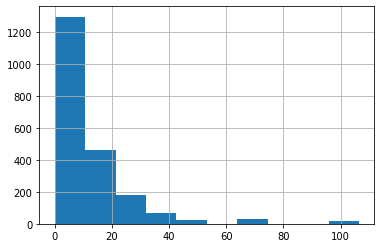

In [ ]:
y_data.hist()

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
model = RandomForestRegressor()#MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)#svm.SVR(kernel='rbf')#RandomForestRegressor()
model.fit(x_data, y_data)
def black_box_function2(residence_time,ratio,concentration,temperature):
    x_data_for_real=vstack((residence_time,ratio,concentration,temperature)).T
    predictions = model.predict(x_data_for_real)
    return np.max(predictions)+np.random.normal(0,1)#think about a variance between 0.1 and 0.2

run a grid search and compare it to the maximum to the smbo if it is similar and compare it with random search 

Try to find the range of black box function the maximum found won't necessarily be the best

In [ ]:
df2=x_data.join(pd.DataFrame(y_data))
df2

,residence_time,ratio,concentration,temperature,conversion
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
0,0.05,0.5,2,6,5.932566
...,...,...,...,...,...
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760
206,1.00,10.0,8,8,5.071760


In [ ]:
df2[df2.iloc[:,-1]==sort(df2.iloc[:,-1].unique())[-1]]


,residence_time,ratio,concentration,temperature,conversion
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
...,...,...,...,...,...
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942
120,0.5,10.0,2,6,106.480942


In [ ]:
black_box_function2(0.5,10.0,2,6)

106.00167463532907

In [ ]:
pbounds1={"residence_time": [x_data['residence_time'].min(), x_data['residence_time'].max()],#x_data['residence_time'].unique(),
         "ratio": [x_data['ratio'].min(), x_data['ratio'].max()],#x_data['ratio'].unique(),
         "concentration": [x_data['concentration'].min(), x_data['concentration'].max()],#x_data['concentration'].unique(),
         "temperature": [x_data['temperature'].min(), x_data['temperature'].max()]}

In [ ]:
param_grid=[{"residence_time": [x_data['residence_time'].min(), x_data['residence_time'].max()],#x_data['residence_time'].unique(),
         "ratio": [x_data['ratio'].min(), x_data['ratio'].max()],#x_data['ratio'].unique(),
         "concentration": [x_data['concentration'].min(), x_data['concentration'].max()],#x_data['concentration'].unique(),
         "temperature": [x_data['temperature'].min(), x_data['temperature'].max()]}]

In [ ]:
df

,residence_time,ratio,concentration,temperature,conversion
0,0.05,0.5,2,6,5.932566
1,0.05,0.5,2,6,5.932566
2,0.05,0.5,2,7,2.173315
3,0.05,0.5,2,7,2.173315
4,0.05,0.5,2,8,1.056175
...,...,...,...,...,...
203,1.00,10.0,8,6,8.643051
204,1.00,10.0,8,7,15.471287
205,1.00,10.0,8,7,15.471287
206,1.00,10.0,8,8,5.071760


In [ ]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}

In [ ]:
x_data.residence_time.unique()
k=50
def iterator(x,i,k):
    return(np.linspace(x.iloc[:,i].min(), x.iloc[:,i].max(), num=k))
iterator(x_data,0,6)

array([0.05, 0.24, 0.43, 0.62, 0.81, 1.  ])

In [ ]:
res=[]
rat=[]
con=[]
temp=[]
bbv=[]
k=6
for residence_time in iterator(x_data,0,k):
    for ratio in iterator(x_data,1,k):
        for concentration in iterator(x_data,2,k):
            for temperature in iterator(x_data,3,k):
                res.append(residence_time)                
                rat.append(ratio)
                con.append(concentration)
                temp.append(temperature)
                bbv.append(black_box_function2(residence_time,ratio,concentration,temperature))

In [ ]:
p=df[df.iloc[:,-1]==sort(df.iloc[:,-1].unique())[-1]]
p[p.index==120].reset_index(drop=True).style.set_caption("Maximum conversion value from data")


,residence_time,ratio,concentration,temperature,conversion
0,0.500000,10.000000,2,6,106.480942


In [ ]:
pd.DataFrame([0.5,10.000000,2,6, black_box_function2(0.5,10.0,2,6)],index=['residence_time','ratio','concentration','temperature','conversion']).T.style.set_caption("Maximum conversion value from black box function")

,residence_time,ratio,concentration,temperature,conversion
0,0.500000,10.000000,2.000000,6.000000,105.368501


In [ ]:
grid=pd.DataFrame([res,rat,con,temp,bbv],index=['residence_time','ratio','concentration','temperature','conversion']).T
grid[grid.conversion==grid.conversion.max()]

,residence_time,ratio,concentration,temperature,conversion
576,0.43,8.1,2.0,6.0,107.400926


In [ ]:
fig = px.scatter_3d(df, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()
fig = px.scatter_3d(grid, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()

In [ ]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}

Do the same thing with random search and keep the iterations the same

In [ ]:
from bayes_opt import SequentialDomainReductionTransformer

In [ ]:
bounds_transformer = SequentialDomainReductionTransformer(minimum_window=0.5)



*   n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
*   init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.



In [ ]:
init_points=100
n_iter=50
optimizer = BayesianOptimization(f = black_box_function2,
                                 pbounds = pbounds1,
                                 random_state=1,
                                 bounds_transformer=bounds_transformer)
optimizer.maximize(init_points = init_points, n_iter = n_iter)

|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 6.935     | 4.502     | 7.343     | 0.05011   | 6.605     |
| 2         | 1.644     | 2.881     | 1.377     | 0.2269    | 6.691     |
| 3         | 10.49     | 4.381     | 5.619     | 0.4482    | 7.37      |
| 4         | 9.407     | 3.227     | 8.842     | 0.07602   | 7.341     |
| 5         | 8.244     | 4.504     | 5.808     | 0.1834    | 6.396     |
| 6         | 44.6      | 6.804     | 9.698     | 0.3478    | 7.385     |
| 7         | 34.68     | 7.258     | 8.999     | 0.1308    | 6.078     |
| 8         | 4.871     | 3.019     | 8.842     | 0.1434    | 6.842     |
| 9         | 27.61     | 7.747     | 5.565     | 0.7073    | 6.631     |
| 10        | 5.456     | 6.119     | 8.429     | 0.06737   | 7.5       |
| 11        | 4.736     | 7.933     | 7.608     | 0.3164    | 7.579     |
| 12        | 2.992     | 2.619     | 

In [ ]:
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

Best result: {'concentration': 2.4339556784894496, 'ratio': 8.319895124981434, 'residence_time': 0.6901899804017654, 'temperature': 6.129661401608277}; f(x) = 108.93963362213212.


| 151       | 107.4     | 2.496     | 8.316     | 0.6773    | 6.079     |
| 152       | 107.4     | 2.455     | 8.07      | 0.5171    | 6.276     |
| 153       | 106.9     | 2.577     | 8.458     | 0.5514    | 6.25      |
| 154       | 106.0     | 2.675     | 8.286     | 0.4925    | 6.038     |
| 155       | 106.2     | 2.649     | 8.502     | 0.6528    | 6.281     |
| 156       | 106.3     | 2.684     | 8.389     | 0.5829    | 6.253     |
| 157       | 106.3     | 2.474     | 8.357     | 0.6928    | 6.112     |
| 158       | 105.6     | 2.32      | 8.457     | 0.4402    | 6.201     |
| 159       | 107.0     | 2.184     | 8.07      | 0.491     | 6.05      |
| 160       | 108.3     | 2.635     | 8.49      | 0.5645    | 6.116     |
| 161       | 4.108     | 2.584     | 8.206     | 0.7895    | 6.102     |
| 162       | 105.4     | 2.616     | 8.351     | 0.5669    | 5.99      |
| 163       | 105.7     | 2.453     | 8.55      | 0.5727    | 6.106     |
| 164       | 106.9     | 2.684     | 

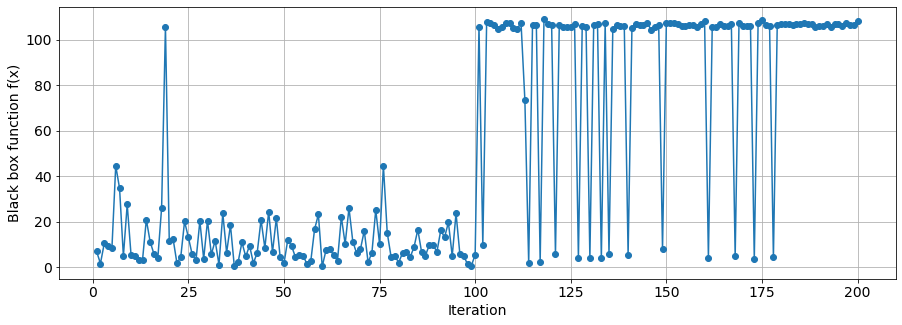

In [ ]:
utility = UtilityFunction(kind = "ei", kappa = 1.96, xi = 0.01)
# Optimization for loop.
for i in range(50):
    # Get optimizer to suggest new parameter values to try using the
    # specified acquisition function.
    next_point = optimizer.suggest(utility)
    # Force degree from float to int.
    # next_point["degree"] = int(next_point["degree"])
    # Evaluate the output of the black_box_function using 
    # the new parameter values.
    target = black_box_function2(**next_point)
    try:
        # Update the optimizer with the evaluation results. 
        # This should be in try-except to catch any errors!
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f155b0fcb20>,
      dtype=object)

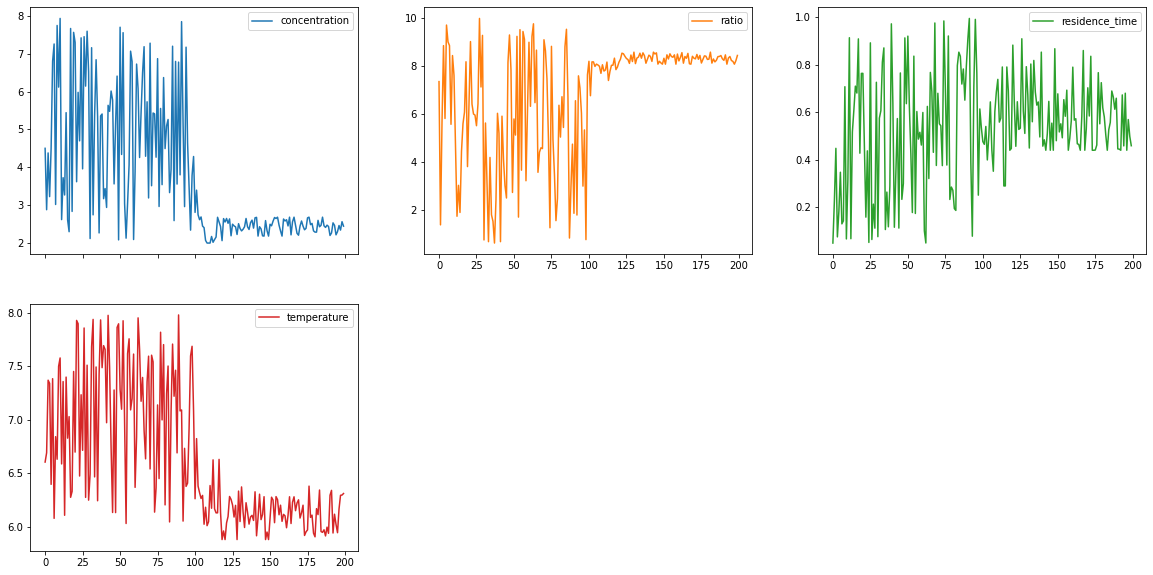

In [ ]:
pd.DataFrame(optimizer.space.params,columns=['concentration','ratio','residence_time','temperature']).plot(subplots=True, layout=(2,3),figsize=(20, 10))

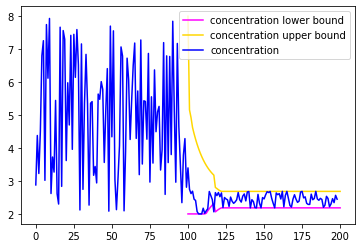

In [ ]:
# example x-bound shrinking - we need to shift the x-axis by the init_points as the bounds
# transformer only mutates when searching - not in the initial phase.
a = np.empty((init_points,))
a[:] = np.nan
concentration_min_bound = np.array([b[0][0] for b in bounds_transformer.bounds])
concentration_min_bound=np.hstack(([a],[concentration_min_bound])).T
concentration_min_bound=np.column_stack((concentration_min_bound.T,np.repeat(concentration_min_bound[-1], n_iter).reshape(1,-1))).T

concentration_max_bound = np.array([b[0][1] for b in bounds_transformer.bounds])
concentration_max_bound=np.hstack(([a],[concentration_max_bound])).T
concentration_max_bound=np.column_stack((concentration_max_bound.T,np.repeat(concentration_max_bound[-1], n_iter).reshape(1,-1))).T


c = [c[0] for c in optimizer.space.params]
plt.plot(concentration_min_bound, label='concentration lower bound',color='magenta')
plt.plot(concentration_max_bound, label='concentration upper bound',color='gold')
plt.plot(c[1:], label='concentration',color='blue')
plt.legend()

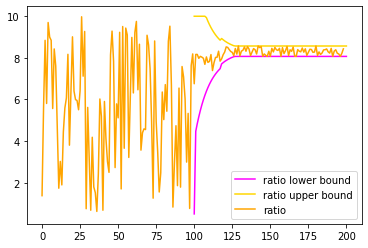

In [ ]:
ratio_min_bound = [b[1][0] for b in bounds_transformer.bounds]
ratio_min_bound=np.hstack(([a],[ratio_min_bound])).T
ratio_min_bound=np.column_stack((ratio_min_bound.T,np.repeat(ratio_min_bound[-1], n_iter).reshape(1,-1))).T

ratio_max_bound = [b[1][1] for b in bounds_transformer.bounds]
ratio_max_bound=np.hstack(([a],[ratio_max_bound])).T
ratio_max_bound=np.column_stack((ratio_max_bound.T,np.repeat(ratio_max_bound[-1], n_iter).reshape(1,-1))).T

c = [c[1] for c in optimizer.space.params]
plt.plot(ratio_min_bound, label='ratio lower bound',color='magenta')
plt.plot(ratio_max_bound, label='ratio upper bound',color='gold')
plt.plot(c[1:], label='ratio',color='orange')
plt.legend()

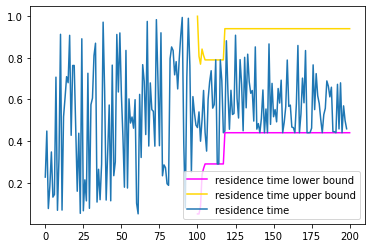

In [ ]:
residence_time_min_bound = [b[2][0] for b in bounds_transformer.bounds]
residence_time_min_bound=np.hstack(([a],[residence_time_min_bound])).T
residence_time_min_bound=np.column_stack((residence_time_min_bound.T,np.repeat(residence_time_min_bound[-1], n_iter).reshape(1,-1))).T


residence_time_max_bound = [b[2][1] for b in bounds_transformer.bounds]
residence_time_max_bound=np.hstack(([a],[residence_time_max_bound])).T
residence_time_max_bound=np.column_stack((residence_time_max_bound.T,np.repeat(residence_time_max_bound[-1], n_iter).reshape(1,-1))).T


c = [c[2] for c in optimizer.space.params]
plt.plot(residence_time_min_bound, label='residence time lower bound',color='magenta')
plt.plot(residence_time_max_bound, label='residence time upper bound',color='gold')
plt.plot(c[1:], label='residence time')
plt.legend()

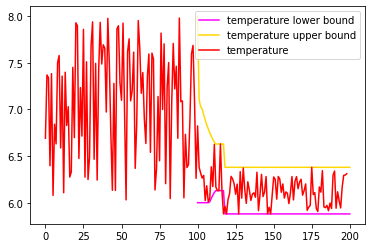

In [ ]:
temperature_min_bound = [b[3][0] for b in bounds_transformer.bounds]
temperature_min_bound=np.hstack(([a],[temperature_min_bound])).T
temperature_min_bound=np.column_stack((temperature_min_bound.T,np.repeat(temperature_min_bound[-1], n_iter).reshape(1,-1))).T

temperature_max_bound = [b[3][1] for b in bounds_transformer.bounds]
temperature_max_bound=np.hstack(([a],[temperature_max_bound])).T
temperature_max_bound=np.column_stack((temperature_max_bound.T,np.repeat(temperature_max_bound[-1], n_iter).reshape(1,-1))).T

c = [c[3] for c in optimizer.space.params]
plt.plot(temperature_min_bound, label='temperature lower bound',color='magenta')
plt.plot(temperature_max_bound, label='temperature upper bound',color='gold')
plt.plot(c[1:], label='temperature',color='red')
plt.legend()

In [ ]:
pbounds1

{'residence_time': [0.05, 1.0],
 'ratio': [0.5, 10.0],
 'concentration': [2, 8],
 'temperature': [6, 8]}


*   Maybe pick one of these
*   Want another figure showing the cumulative maximium 
*   Try running a few trials with different random seeds
*   Get an uncertainty band from those random seeds
*   instead of one point at a time, do a batch of multiple points at each iterations 
*   compute acquisition function for many points pick five candidate points with the highest acquistion function
*    try different functions and noise levels

*Have* one week to write it all up and submit the write up.

# Figure showing the cumulative maximium 

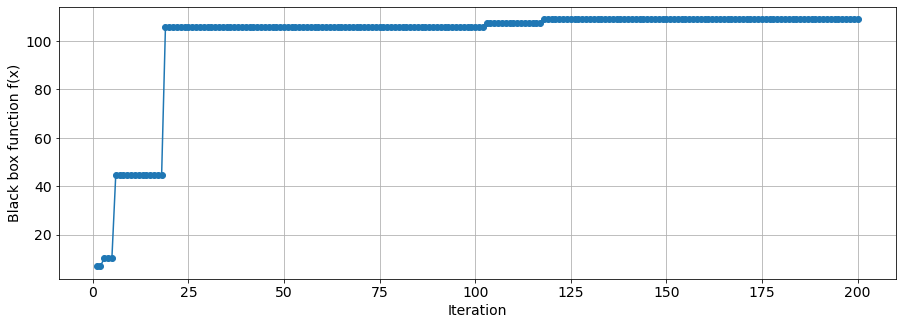

In [ ]:
plt.figure(figsize = (15, 5))
cummulative_max=pd.Series(optimizer.space.target).cummax()
plt.plot(range(1, 1 + len(cummulative_max)), cummulative_max, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

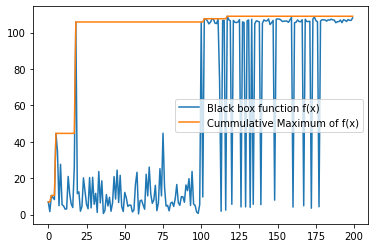

In [ ]:
pd.DataFrame([optimizer.space.target,pd.Series(optimizer.space.target).cummax()],index=["Black box function f(x)","Cummulative Maximum of f(x)"]).T.plot()

# Running a few trials with different random seeds

In [ ]:
def blackboxoptseedfunction(init_points,n_iter,loop_iterations,seed,variance_between_0p1_and_0p2):
    import random
    df_plot=df.copy()

    random.seed(seed)
    
    def inner_black_box_function2(residence_time,ratio,concentration,temperature):
        x_data_for_real=vstack((residence_time,ratio,concentration,temperature)).T
        predictions = model.predict(x_data_for_real)
        return np.max(predictions)+np.random.normal(0,variance_between_0p1_and_0p2)#think about a variance between 0.1 and 0.2


    optimizer = BayesianOptimization(f = inner_black_box_function2,
                                     random_state=seed,
                                    pbounds = pbounds1)
    optimizer.maximize(init_points = init_points, n_iter = n_iter)
    utility = UtilityFunction(kind = "poi", kappa = 1.96, xi = 0.01)
    # Optimization for loop.
    for i in range(loop_iterations):
        # Get optimizer to suggest new parameter values to try using the
        # specified acquisition function.
        next_point = optimizer.suggest(utility)
        n_point_df=pd.DataFrame([next_point], columns=next_point.keys())
        bbf_point_df=pd.DataFrame([black_box_function2(**next_point)],columns=["conversion"])
        next_point_df=n_point_df.join(bbf_point_df)
        df_plot=pd.concat([df_plot, next_point_df], ignore_index=True)
        # Force degree from float to int.
        # next_point["degree"] = int(next_point["degree"])
        # Evaluate the output of the black_box_function using 
        # the new parameter values.
        target = black_box_function2(**next_point)
        try:
            # Update the optimizer with the evaluation results. 
            # This should be in try-except to catch any errors!
            optimizer.register(params = next_point, target = target)
        except:
            pass
    print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
    plt.figure(figsize = (15, 5))
    optimization_data=pd.DataFrame([optimizer.space.target,pd.Series(optimizer.space.target).cummax()],index=["Black box function f(x)","Cummulative Maximum of f(x)"]).T
    optimization_data.plot(figsize=(20, 10))
    plt.grid(True)
    plt.xlabel("Iteration", fontsize = 14)
    plt.ylabel("Black box function f(x)", fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    fig = px.scatter_3d(df.copy(), x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
    fig.show()
    fig = px.scatter_3d(df_plot, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
    fig.show()

in terms of efficiency what are the ranges of initial points
test 10 for both

fix number of iterations and see the max
first set a goal of when to stop algorithm and see iterations


How many data points do you need for a certain conversion?

In [ ]:
df

,residence_time,ratio,concentration,temperature,conversion
0,0.05,0.5,2,6,5.932566
1,0.05,0.5,2,6,5.932566
2,0.05,0.5,2,7,2.173315
3,0.05,0.5,2,7,2.173315
4,0.05,0.5,2,8,1.056175
...,...,...,...,...,...
203,1.00,10.0,8,6,8.643051
204,1.00,10.0,8,7,15.471287
205,1.00,10.0,8,7,15.471287
206,1.00,10.0,8,8,5.071760


 

1.   n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
2.   init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.




|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 6.919     | 4.502     | 7.343     | 0.05011   | 6.605     |
| 2         | 2.158     | 2.881     | 1.377     | 0.2269    | 6.691     |
| 3         | 9.726     | 4.381     | 5.619     | 0.4482    | 7.37      |
| 4         | 7.975     | 3.227     | 8.842     | 0.07602   | 7.341     |
| 5         | 8.683     | 4.504     | 5.808     | 0.1834    | 6.396     |
| 6         | 45.3      | 6.804     | 9.698     | 0.3478    | 7.385     |
| 7         | 33.34     | 7.258     | 8.999     | 0.1308    | 6.078     |
| 8         | 7.884     | 3.019     | 8.842     | 0.1434    | 6.842     |
| 9         | 26.25     | 7.747     | 5.565     | 0.7073    | 6.631     |
| 10        | 4.91      | 6.119     | 8.429     | 0.06737   | 7.5       |
| 11        | 6.006     | 7.933     | 7.608     | 0.3164    | 7.579     |
| 12        | 2.843     | 2.619     | 

<Figure size 1080x360 with 0 Axes>

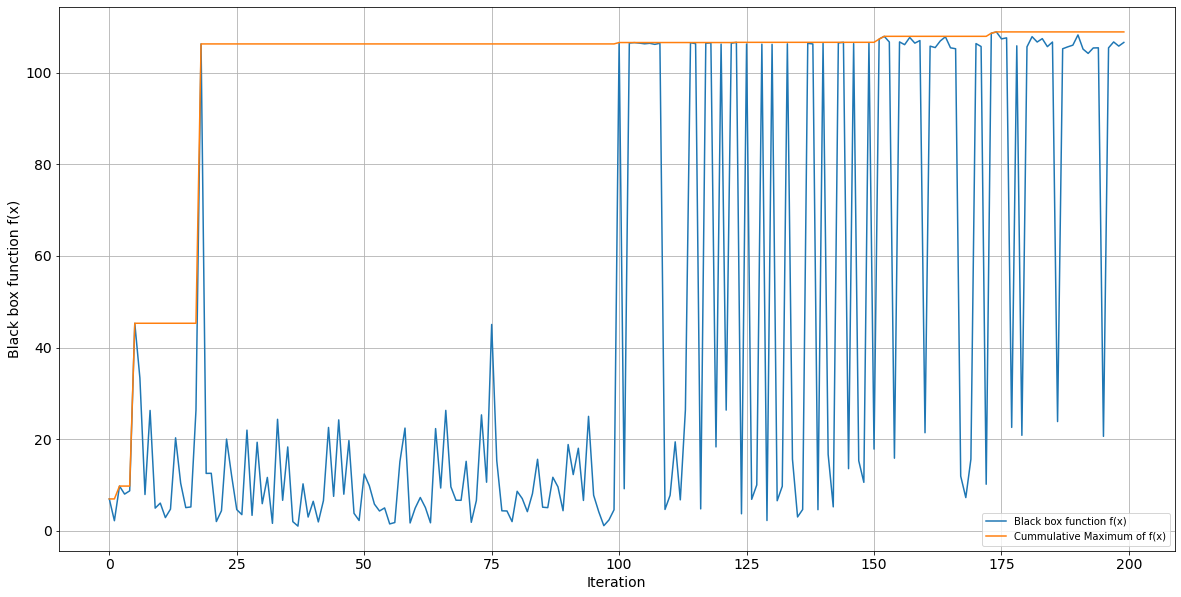

In [ ]:
blackboxoptseedfunction(100,50,50,1,0.15)

make another 3d graph swap axis


color for conversion


visualize bbf with the graph


bbf should look more or less like a step function 

|   iter    |  target   | concen... |   ratio   | reside... | temper... |
-------------------------------------------------------------------------
| 1         | 9.843     | 4.616     | 0.7463    | 0.5722    | 6.871     |
| 2         | 7.302     | 4.522     | 3.638     | 0.2444    | 7.239     |
| 3         | 9.453     | 3.798     | 3.035     | 0.6401    | 7.058     |
| 4         | 0.9571    | 2.807     | 5.379     | 0.2252    | 7.571     |
| 5         | 26.51     | 7.124     | 5.195     | 0.8542    | 6.159     |
| 6         | 17.99     | 5.031     | 1.12      | 0.4567    | 6.193     |
| 7         | -0.004249 | 2.763     | 6.169     | 0.2647    | 6.214     |
| 8         | 20.21     | 3.322     | 3.823     | 0.4944    | 6.403     |
| 9         | 22.43     | 5.842     | 5.089     | 0.53      | 6.774     |
| 10        | 7.163     | 6.762     | 6.01      | 0.2042    | 7.402     |
| 11        | 12.26     | 7.787     | 5.25      | 0.895     | 6.683     |
| 12        | 6.71      | 5.403     | 

<Figure size 1080x360 with 0 Axes>

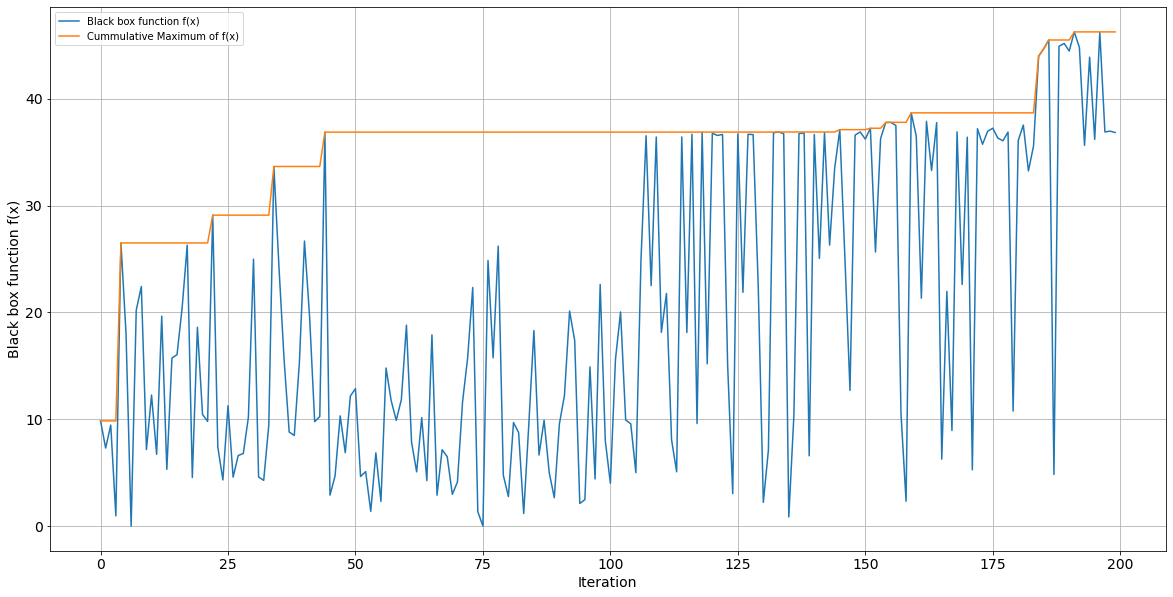

In [ ]:
blackboxoptseedfunction(100,50,50,2,0.15)

In [ ]:
concentration_obs = np.array([[res["params"]["concentration"]] for res in optimizer.res])
ratio_obs = np.array([[res["params"]["ratio"]] for res in optimizer.res])
residence_time_obs = np.array([[res["params"]["residence_time"]] for res in optimizer.res])
temperature_obs = np.array([[res["params"]["temperature"]] for res in optimizer.res])
x_obs=pd.DataFrame(np.concatenate((residence_time_obs,ratio_obs,concentration_obs,temperature_obs),axis=1),columns=x_data.columns)
y_obs = pd.DataFrame(np.array([res["target"] for res in optimizer.res]),columns=['conversion'])

In [ ]:
x_obs

In [ ]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

In [ ]:
utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)
# Optimization for loop.
for i in range(50):
    # Get optimizer to suggest new parameter values to try using the
    # specified acquisition function.
    next_point = optimizer.suggest(utility)
    # Force degree from float to int.
    # next_point["degree"] = int(next_point["degree"])
    # Evaluate the output of the black_box_function using 
    # the new parameter values.
    target = black_box_function2(**next_point)
    try:
        # Update the optimizer with the evaluation results. 
        # This should be in try-except to catch any errors!
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
pbounds1

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
fig = px.scatter_3d(df, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()


In [ ]:
n_point_df=pd.DataFrame([next_point], columns=next_point.keys())
bbf_point_df=pd.DataFrame([black_box_function2(**next_point)],columns=["conversion"])
next_point_df=n_point_df.join(bbf_point_df)
next_point_df

In [ ]:
df_plot=df.copy()
df_plot

In [ ]:
# pd.DataFrame.from_dict(next_point)
pd.DataFrame([next_point], columns=next_point.keys())

In [ ]:
df_plot=df.copy()
fig = px.scatter_3d(df_plot, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()
text = input("press enter to start")
optimizer = BayesianOptimization(f = black_box_function2,
                                 pbounds = pbounds1)
optimizer.maximize(init_points = 100, n_iter = 25)
utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)

while text =="":
    for i in range(1):
        next_point = optimizer.suggest(utility)
        n_point_df=pd.DataFrame([next_point], columns=next_point.keys())
        bbf_point_df=pd.DataFrame([black_box_function2(**next_point)],columns=["conversion"])
        next_point_df=n_point_df.join(bbf_point_df)
        df_plot=pd.concat([df_plot, next_point_df], ignore_index=True)
        target = black_box_function2(**next_point)
        try:
            # Update the optimizer with the evaluation results. 
            # This should be in try-except to catch any errors!
            optimizer.register(params = next_point, target = target)
        except:
            pass
    text = input("press enter for next iteration")
    print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
fig = px.scatter_3d(df_plot, x='concentration', y='residence_time', z='temperature', size='ratio', color='conversion',
                    hover_data=['conversion'])
fig.show()